# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import (
  train_test_split
)

from sklearn.linear_model import (
  LogisticRegression
)

from sklearn.tree import (
  DecisionTreeClassifier,
  plot_tree
)

from sklearn.svm import (
  SVC
)

from sklearn.metrics import (
  accuracy_score
)

from sklearn.inspection import (
  DecisionBoundaryDisplay
)

from sklearn.preprocessing import (
  StandardScaler,
  OneHotEncoder
)

from sklearn.pipeline import make_pipeline

from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import (
  RandomForestClassifier
)

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [207]:
df = pd.read_csv('../../datasets/checker_submits.csv',parse_dates=['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df.drop(columns=['timestamp'], inplace=True)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [208]:
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()
X_cat_encoded = encoder.fit_transform(df[['uid', 'labname',]])
df_encoded_cat = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out())

X_con_scaled = scaler.fit_transform(df[['numTrials', 'hour', ]])
df_con_scaled = pd.DataFrame(X_con_scaled, columns=['numTrials', 'hour'])
df_target = (df['dayofweek'])

dayofweek = pd.concat([df_target, df_con_scaled, df_encoded_cat], axis=1)
dayofweek.to_csv('dayofweek.csv', index=False)

In [209]:
dayofweek

,dayofweek,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,4,-0.788667,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,-0.756764,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,-0.724861,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,-0.692958,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,-0.661055,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,3,-0.533442,0.945382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,3,-0.629151,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,3,-0.597248,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,3,-0.565345,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [210]:
accuracy_score(df['dayofweek'],[ df['dayofweek'].mode()[0]] * len(df['dayofweek']))

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [211]:
X = dayofweek.drop(columns=['dayofweek'])
y = dayofweek['dayofweek']

random_state = 21
fit_intercept = False
probability = True

In [212]:
logreg = LogisticRegression(
  random_state=random_state,
  fit_intercept=fit_intercept,
  solver='liblinear'
)

logreg.fit(X, y)


LogisticRegression(fit_intercept=False, random_state=21, solver='liblinear')

In [213]:
accuracy_score(df['dayofweek'], logreg.predict(X))

0.6215895610913404

In [214]:
def plot_top_features(coefficients, feature_names, top_n=10, title="Top Feature Importances"):
    """
    Plots a horizontal bar chart of the top-n most important features based on model coefficients.

    Parameters:
        coefficients (array-like): Coefficients or feature importances from a model.
        feature_names (list): List of feature names (same length as coefficients).
        top_n (int): Number of top features to display.
        title (str): Title of the plot.
    """
    
    top_indices = np.argsort(coefficients)[-top_n:]

    top_features = feature_names[top_indices]
    top_coefficients = coefficients[top_indices]

    importance_df = pd.DataFrame({
        'Feature': top_features,
        'Coefficient': top_coefficients
    })
    importance_df.plot(kind='barh', x='Feature', y='Coefficient', title=title, figsize=(15, 8))

    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

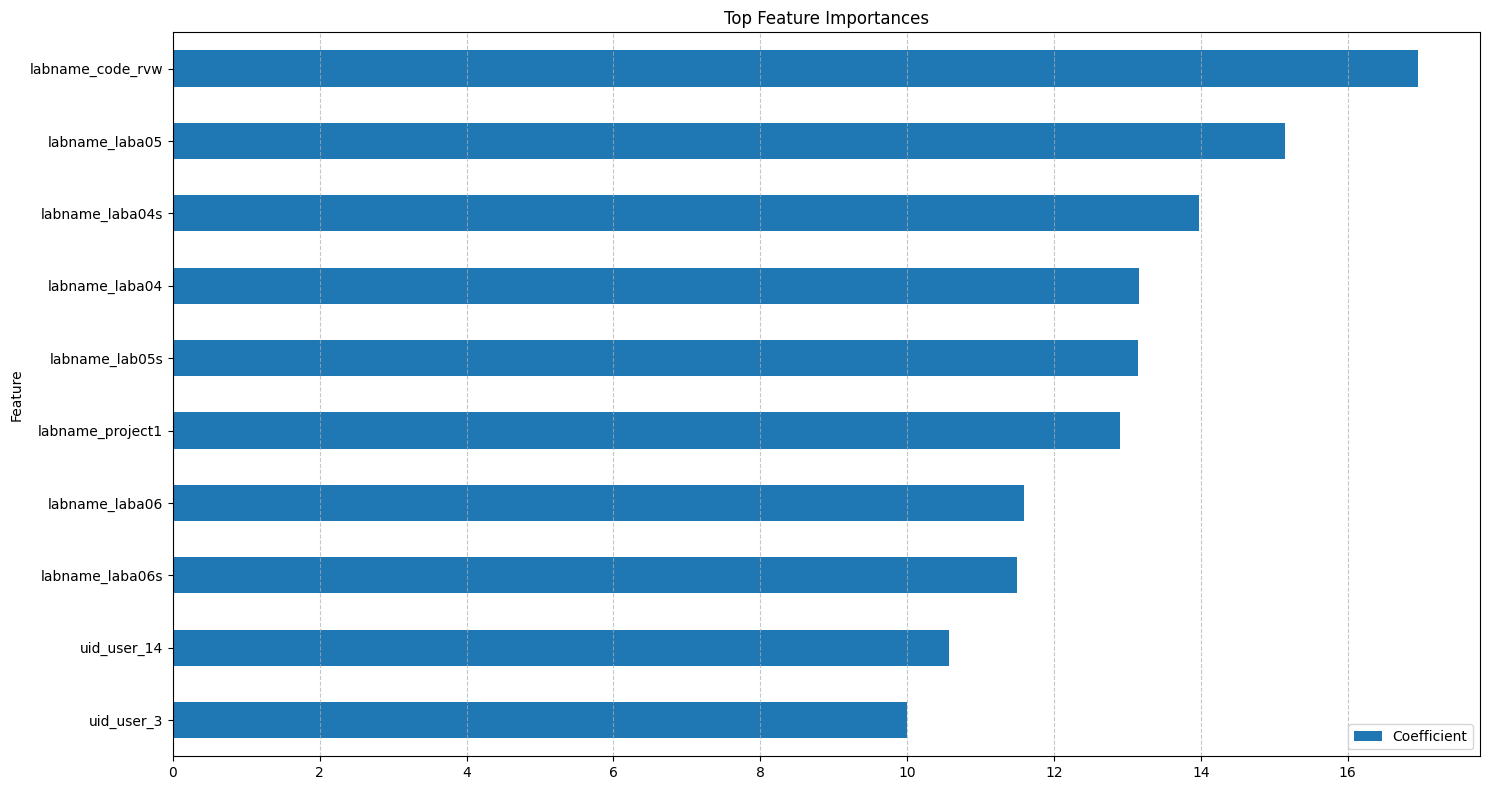

In [215]:
logreg_coefs = np.sum(np.abs(logreg.coef_), axis=0)
plot_top_features(logreg_coefs, X.columns, top_n=10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [216]:
svc = OneVsRestClassifier(
  SVC(
    kernel='linear',
    random_state=random_state,
    probability=probability
  )
)

svc.fit(X, y)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

In [217]:
accuracy_score(df['dayofweek'], svc.predict(X))

0.6126927639383155

In [218]:
svc_coefs = np.vstack([estimator.coef_ for estimator in svc.estimators_])
svc_coefs = np.sum(np.abs(svc_coefs), axis=0)

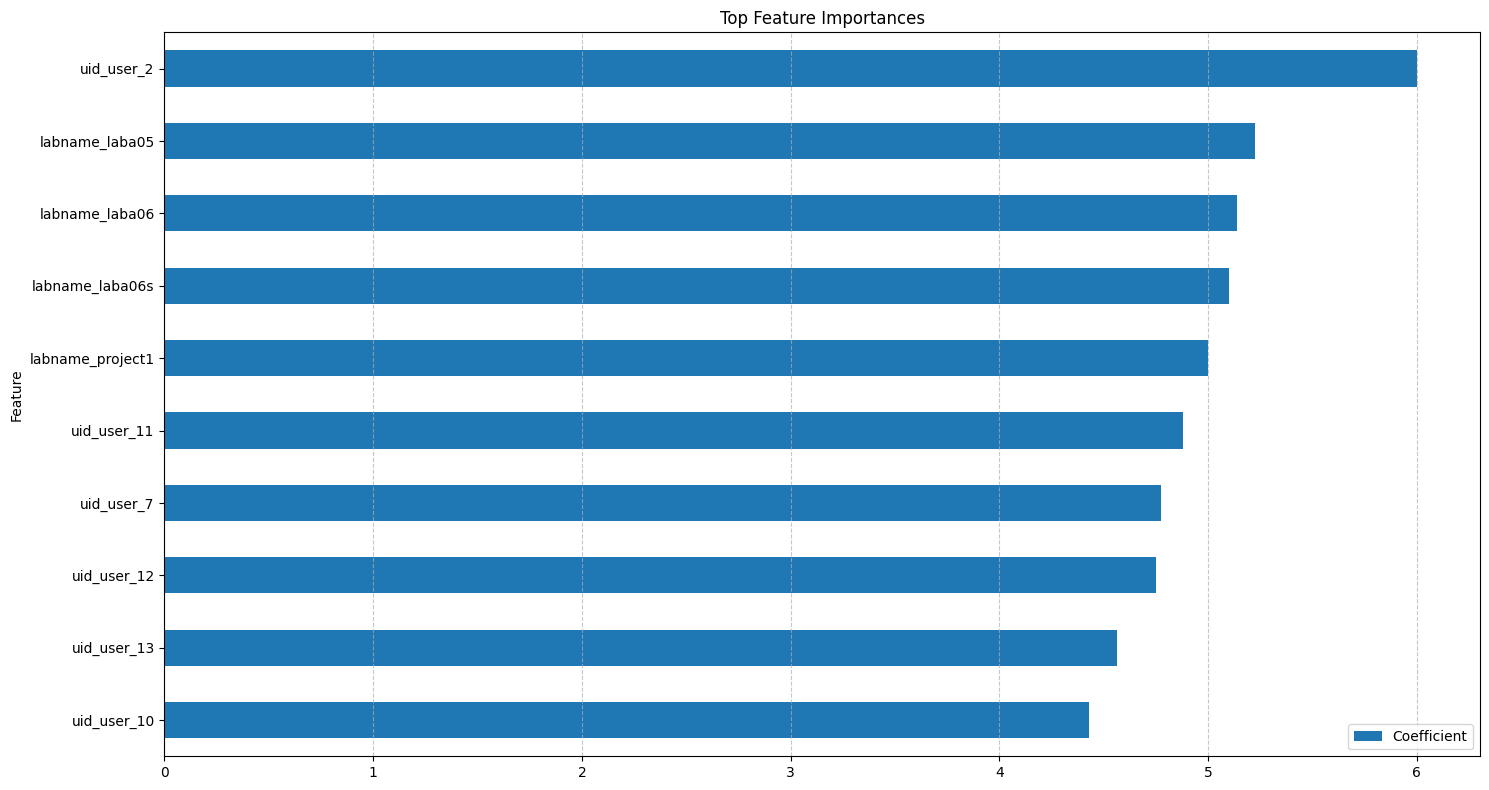

In [219]:
plot_top_features(svc_coefs, X.columns, top_n=10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [220]:
tree = DecisionTreeClassifier(
  random_state=random_state,
  max_depth=4
)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [221]:
accuracy_score(df['dayofweek'], tree.predict(X))

0.5516014234875445

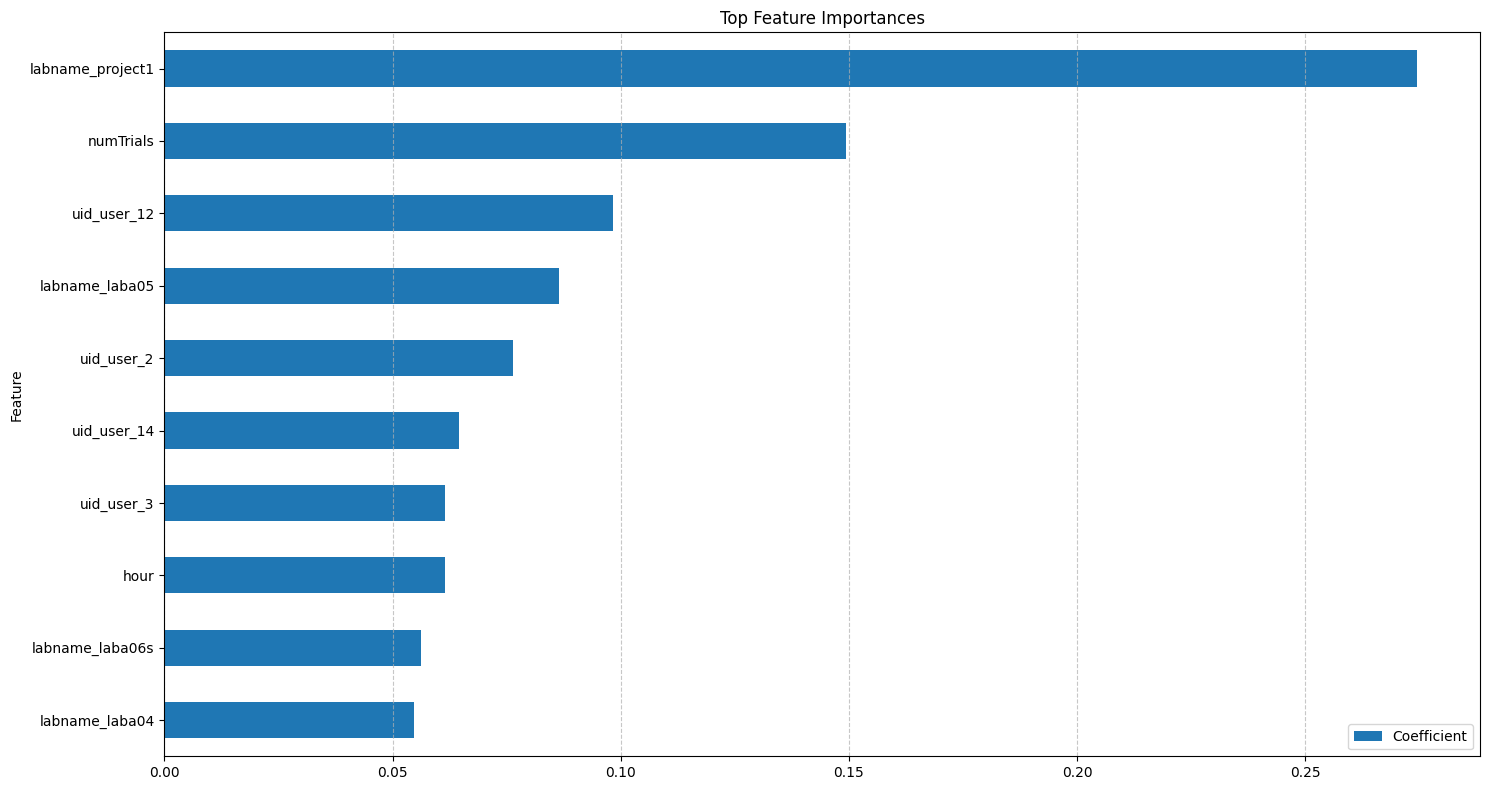

In [222]:
plot_top_features(tree.feature_importances_, X.columns, top_n=10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [223]:
forest = RandomForestClassifier(
  n_estimators=100,
  max_depth=25,
  random_state=random_state
)

forest.fit(X, y)

RandomForestClassifier(max_depth=25, random_state=21)

In [224]:
accuracy_score(df['dayofweek'], forest.predict(X))

1.0

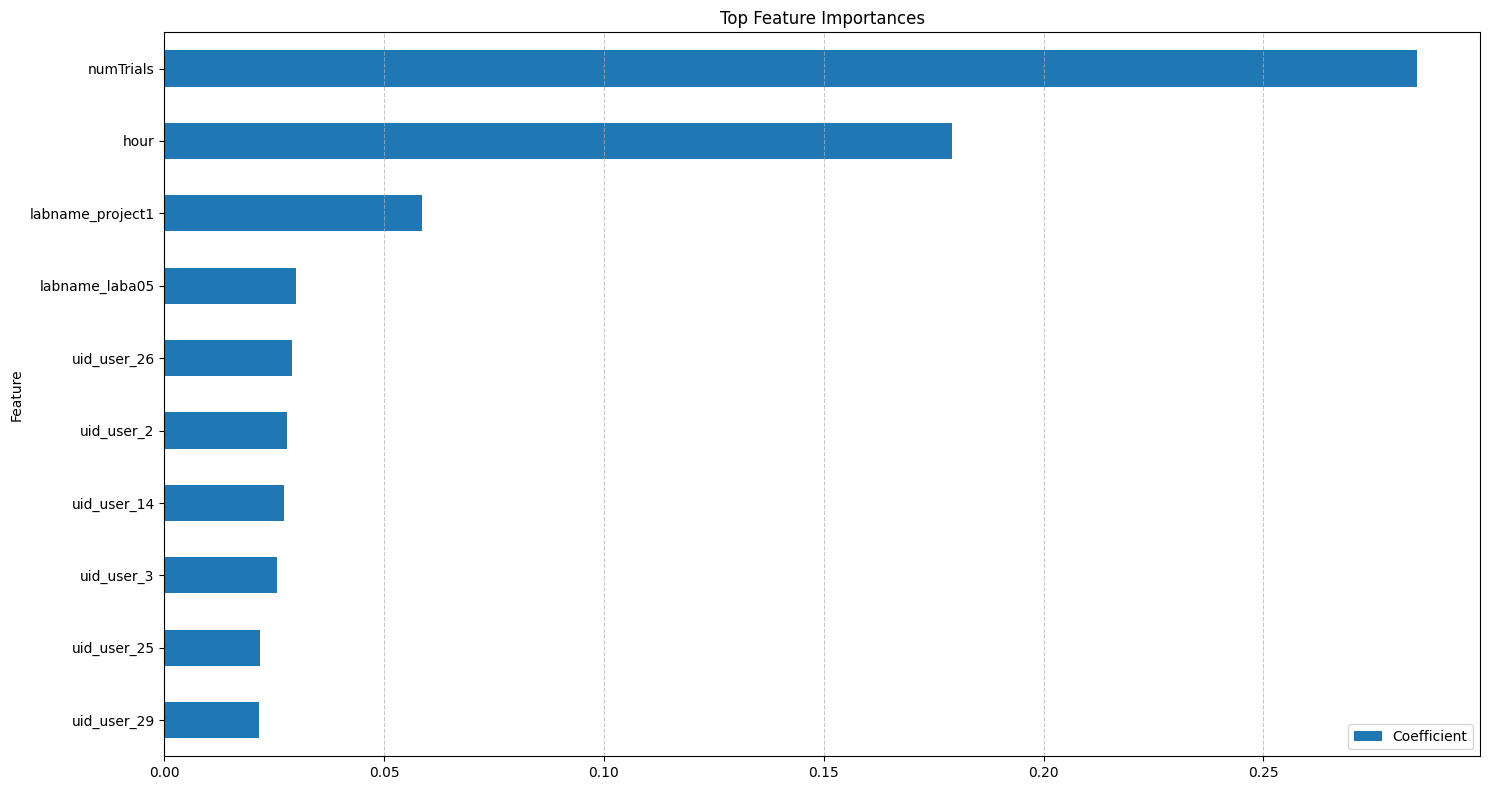

In [225]:
plot_top_features(forest.feature_importances_, X.columns, top_n=10)